# Image Net comparing with Custom Net

- AlexNet (2012)
- GoogleNet (2014)
- VGGNet (2014)
- ResNet (2015)
- Inception ResNet (2016)

그리고

- CustomNet1
- CustomNet2

## AlexNet
[참고 자료](http://laonple.blog.me/220654387455)

![](./images/alexnet.png)

- 5 Convolutional Layers
- 3 Fully Connected Layers
- 1000 ways Softmax

```python
network = input_data(shape=[None, 128, 128, 3])
network = conv_2d(network, 96, 11, strides=4, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = conv_2d(network, 256, 5, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = conv_2d(network, 384, 3, activation='relu')
network = conv_2d(network, 384, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = fully_connected(network, 4096, activation='tanh')
network = dropout(network, 0.5)
network = fully_connected(network, 4096, activation='tanh')
network = dropout(network, 0.5)
network = fully_connected(network, 2, activation='softmax')
network = regression(network, optimizer='momentum',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)
```
차이점: input, output

## GoogleNet
[참고 자료](http://laonple.blog.me/220686328027)

특징
- Deeper
- Inception구조: 1x1 convolution
- Fully connected layer가 없음

![](http://postfiles8.naver.net/20160418_167/laonple_1460944007914pndkQ_PNG/041816_0146_4.png?type=w2)

## VGGNet
[참고 자료](http://laonple.blog.me/220738560542)

특징
- `GoogleNet`보다 간단한 구조

![](http://postfiles6.naver.net/20160709_69/laonple_1468026496381NVR0l_PNG/VGGNet.png?type=w2)

![](http://postfiles3.naver.net/20160516_162/laonple_1463355951083CXP53_PNG/%C0%CC%B9%CC%C1%F6_3.png?type=w2)

```python
x = tflearn.input_data(shape=[None, 32, 32, 3], name='input')  # 원래는 224x224
x = tflearn.conv_2d(x, 64, 3, activation='relu', scope='conv1_1')
x = tflearn.conv_2d(x, 64, 3, activation='relu', scope='conv1_2')
x = tflearn.max_pool_2d(x, 2, strides=2, name='maxpool1')

x = tflearn.conv_2d(x, 128, 3, activation='relu', scope='conv2_1')
x = tflearn.conv_2d(x, 128, 3, activation='relu', scope='conv2_2')
x = tflearn.max_pool_2d(x, 2, strides=2, name='maxpool2')

x = tflearn.conv_2d(x, 256, 3, activation='relu', scope='conv3_1')
x = tflearn.conv_2d(x, 256, 3, activation='relu', scope='conv3_2')
x = tflearn.conv_2d(x, 256, 3, activation='relu', scope='conv3_3')
x = tflearn.max_pool_2d(x, 2, strides=2, name='maxpool3')

x = tflearn.conv_2d(x, 512, 3, activation='relu', scope='conv4_1')
x = tflearn.conv_2d(x, 512, 3, activation='relu', scope='conv4_2')
x = tflearn.conv_2d(x, 512, 3, activation='relu', scope='conv4_3')
x = tflearn.max_pool_2d(x, 2, strides=2, name='maxpool4')

x = tflearn.conv_2d(x, 512, 3, activation='relu', scope='conv5_1')
x = tflearn.conv_2d(x, 512, 3, activation='relu', scope='conv5_2')
x = tflearn.conv_2d(x, 512, 3, activation='relu', scope='conv5_3')
x = tflearn.max_pool_2d(x, 2, strides=2, name='maxpool5')

x = tflearn.fully_connected(x, 4096, activation='relu', scope='fc6')
x = tflearn.dropout(x, 0.5, name='dropout1')

x = tflearn.fully_connected(x, 4096, activation='relu', scope='fc7')
x = tflearn.dropout(x, 0.5, name='dropout2')

x = tflearn.fully_connected(x, 2, activation='softmax', scope='fc8')
x = regression(x, optimizer='adam',
               loss='categorical_crossentropy',
               learning_rate=0.003)
```
차이점: input, output

## ResNet
[참고자료](http://laonple.blog.me/220761052425)

특징
- shortcut
- Deep해서 얻는 side effect 개선
- 복잡도(연산량)를 줄이기 위해 pooling, hidden fc, dropout 사용 안함

![](https://image.slidesharecdn.com/resnet-160112143752/95/deep-residual-learning-ilsvrc2015-winner-10-638.jpg?cb=1452609770)

## Inception ResNet
[참고 자료](http://laonple.blog.me/220761052425)

특징
- 빠른 학습속도
- Inception v 4와 residual net

![](https://1.bp.blogspot.com/-O7AznVGY9js/V8cV_wKKsMI/AAAAAAAABKQ/maO7n2w3dT4Pkcmk7wgGqiSX5FUW2sfZgCLcB/s1600/image00.png)

## CustomNet

```python
net = input_data(shape=[None, 64, 64, 1], name="input")
net = conv_2d(net, 16, 7, activation="relu")
net = conv_2d(net, 32, 5, activation="relu")
net = conv_2d(net, 64, 3, activation="relu")
net = max_pool_2d(net, 5)

net = conv_2d(net, 16, 7, activation="relu")
net = conv_2d(net, 32, 5, activation="relu")
net = conv_2d(net, 64, 3, activation="relu")
net = max_pool_2d(net, 5)

net = conv_2d(net, 16, 5, activation="relu")
net = conv_2d(net, 32, 5, activation="relu")
net = conv_2d(net, 64, 5, activation="relu")
net = max_pool_2d(net, 2)

net = conv_2d(net, 16, 3, activation="relu")
net = conv_2d(net, 32, 3, activation="relu")
net = conv_2d(net, 64, 3, activation="relu")
net = max_pool_2d(net, 2)

net = fully_connected(net, 1024, activation="relu")
net = dropout(net, 0.6)

net = fully_connected(net, 2, activation="softmax")
net = regression(
    net, 
    optimizer="adam", 
    learning_rate=0.0003, 
    loss="categorical_crossentropy",
    name="targets"
)
```

---

# Code

## Import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

## Load Data

In [2]:
csv_list = [file for file in os.listdir("./csv") if file.endswith("csv")]

In [3]:
acc_list = [file for file in csv_list if file.find("Accuracy") > 0]
acc_list

['run_AlexNet_basic,tag_Accuracy-Validation.csv',
 'run_AlexNet_basic,tag_Accuracy.csv',
 'run_Custom1_12conv-1full,tag_Accuracy-Validation.csv',
 'run_Custom1_12conv-1full,tag_Accuracy.csv',
 'run_Custom2,tag_Accuracy-Validation.csv',
 'run_Custom2,tag_Accuracy.csv',
 'run_GoogleNet_basic,tag_Accuracy-Validation.csv',
 'run_GoogleNet_basic,tag_Accuracy.csv',
 'run_Inception_ResNet_basic,tag_Accuracy-Validation.csv',
 'run_Inception_ResNet_basic,tag_Accuracy.csv',
 'run_ResNet_56,tag_Accuracy-Validation.csv',
 'run_ResNet_56,tag_Accuracy.csv',
 'run_VGG16_basic_64x64,tag_Accuracy-Validation.csv',
 'run_VGG16_basic_64x64,tag_Accuracy.csv']

In [4]:
loss_list = [file for file in csv_list if file.find("Loss") > 0]
loss_list

['run_AlexNet_basic,tag_Loss-Validation.csv',
 'run_AlexNet_basic,tag_Loss.csv',
 'run_Custom1_12conv-1full,tag_Loss-Validation.csv',
 'run_Custom1_12conv-1full,tag_Loss.csv',
 'run_Custom2,tag_Loss-Validation.csv',
 'run_Custom2,tag_Loss.csv',
 'run_GoogleNet_basic,tag_Loss-Validation.csv',
 'run_GoogleNet_basic,tag_Loss.csv',
 'run_Inception_ResNet_basic,tag_Loss-Validation.csv',
 'run_Inception_ResNet_basic,tag_Loss.csv',
 'run_ResNet_56,tag_Loss-Validation.csv',
 'run_ResNet_56,tag_Loss.csv',
 'run_VGG16_basic_64x64,tag_Loss.csv']

## Split to train and test

In [5]:
def split(source):
    dic = {"train":[], "test":[]}
    for file in source:
        if file.find("Validation") > 0:
            dic["test"].append(file)
        else:
            dic["train"].append(file)
    return dic

In [6]:
acc = split(acc_list)
acc

{'test': ['run_AlexNet_basic,tag_Accuracy-Validation.csv',
  'run_Custom1_12conv-1full,tag_Accuracy-Validation.csv',
  'run_Custom2,tag_Accuracy-Validation.csv',
  'run_GoogleNet_basic,tag_Accuracy-Validation.csv',
  'run_Inception_ResNet_basic,tag_Accuracy-Validation.csv',
  'run_ResNet_56,tag_Accuracy-Validation.csv',
  'run_VGG16_basic_64x64,tag_Accuracy-Validation.csv'],
 'train': ['run_AlexNet_basic,tag_Accuracy.csv',
  'run_Custom1_12conv-1full,tag_Accuracy.csv',
  'run_Custom2,tag_Accuracy.csv',
  'run_GoogleNet_basic,tag_Accuracy.csv',
  'run_Inception_ResNet_basic,tag_Accuracy.csv',
  'run_ResNet_56,tag_Accuracy.csv',
  'run_VGG16_basic_64x64,tag_Accuracy.csv']}

In [7]:
loss = split(loss_list)

## Read from CSV

In [8]:
def read_to_panel(source):
    return pd.Panel(dict((csv.split(",")[0].split("_")[1], pd.read_csv("csv/"+csv))  for csv in source))

In [9]:
acc_train_df = read_to_panel(acc["train"])
acc_train_df

<class 'pandas.core.panel.Panel'>
Dimensions: 7 (items) x 1000 (major_axis) x 3 (minor_axis)
Items axis: AlexNet to VGG16
Major_axis axis: 0 to 999
Minor_axis axis: Wall time to Value

In [10]:
acc_train_df.to_frame().head()

AlexNet       Custom1       Custom2     GoogleNet  \
major minor                                                               
0     Wall time  1.500737e+09  1.499942e+09  1.499951e+09  1.500726e+09   
      Step       2.000000e+01  7.000000e+00  7.000000e+00  2.000000e+01   
      Value      4.902267e-01  5.023913e-01  4.581294e-01  5.107340e-01   
1     Wall time  1.500737e+09  1.499942e+09  1.499951e+09  1.500726e+09   
      Step       2.600000e+01  2.000000e+01  1.700000e+01  2.600000e+01   

                    Inception        ResNet         VGG16  
major minor                                                
0     Wall time  1.500729e+09  1.500955e+09  1.500723e+09  
      Step       2.000000e+01  2.000000e+01  5.000000e+00  
      Value      4.714479e-01  5.113257e-01  4.322334e-01  
1     Wall time  1.500729e+09  1.500955e+09  1.500723e+09  
      Step       2.600000e+01  2.600000e+01  7.000000e+00

In [11]:
acc_train_df["AlexNet"].head()

,Wall time,Step,Value
0,1.500737e+09,20.0,0.490227
1,1.500737e+09,26.0,0.484156
2,1.500737e+09,42.0,0.521809
3,1.500737e+09,44.0,0.496770
4,1.500737e+09,47.0,0.516145


In [12]:
acc_test_df = read_to_panel(acc["test"])
loss_train_df = read_to_panel(loss["train"])
loss_test_df = read_to_panel(loss["test"])

In [13]:
all_df = Series([acc_train_df, acc_test_df, loss_train_df, loss_test_df])
keys = acc_train_df.keys().values
keys

array(['AlexNet', 'Custom1', 'Custom2', 'GoogleNet', 'Inception', 'ResNet',
       'VGG16'], dtype=object)

## Utility function

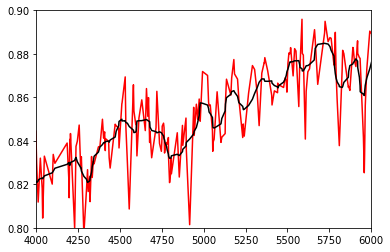

In [14]:
def smooth_a(x, beta=2):
    """손실 함수의 그래프를 매끄럽게 하기 위해 사용
    
    참고：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, beta)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]

df = pd.read_csv("csv/"+acc["train"][0])
plt.plot(df["Step"], df["Value"], color='r');
plt.plot(df["Step"], smooth_a(df["Value"]), color='k')
plt.xlim(4000, 6000)
plt.ylim(0.8, 0.9)
plt.show()

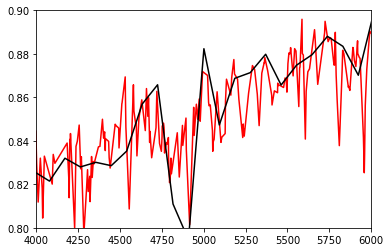

In [15]:
from scipy.interpolate import splrep, BSpline
def smooth(x, y, step=100):
    x_smooth = np.linspace(x.min(), x.max(), step)
    spline = BSpline(*splrep(x, y, s=0, k=2), extrapolate=False)
    y_smooth = spline(x_smooth)
    return x_smooth, y_smooth

plt.plot(df["Step"], df["Value"], color='r');
plt.plot(*smooth(df["Step"], df["Value"]), color='k')
plt.xlim(4000, 6000)
plt.ylim(0.8, 0.9)
plt.show()

## Visualize

In [16]:
color_map = {}
for key in keys:
    color_map[key] = (np.random.rand(), np.random.rand(), np.random.rand())
color_map = Series(color_map)
color_map

AlexNet      (0.3560528939169215, 0.5538398081555921, 0.964...
Custom1      (0.9105364757374617, 0.9166951415074782, 0.383...
Custom2      (0.462944047792606, 0.9447709856072558, 0.8789...
GoogleNet    (0.9140001109583642, 0.47405156708228624, 0.92...
Inception    (0.5560567860309596, 0.16167722366203596, 0.77...
ResNet       (0.4049308945491036, 0.22109007356825994, 0.77...
VGG16        (0.6347748427241705, 0.5548842405245357, 0.618...
dtype: object

In [17]:
image_net = np.array([key for key in keys if not key.startswith("Custom")])
custom_net = np.array([key for key in keys if key.startswith("Custom")])

### Popular Net

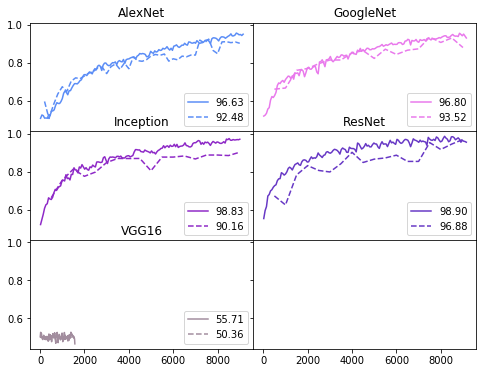

In [18]:
fig, subplots = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8, 6))
subplots = subplots.flatten()
plt.subplots_adjust(wspace=0, hspace=0)
for idx, name in enumerate(image_net):
    ax = subplots[idx]
    df = acc_train_df[name]
    best = df["Value"].max()
    ax.plot(*smooth(df["Step"], smooth_a(df["Value"]), 150), color=color_map[name], label="{:.2f}".format(best * 100))

    df = acc_test_df[name]
    best = df["Value"].max()
    ax.plot(df["Step"], df["Value"], linestyle="--", color=color_map[name], label="{:.2f}".format(best * 100))
    ax.set_title(name)
    ax.legend(loc="lower right")

In [19]:
def draw_acc(source, train, test):
    for name in source:
        df = train[name]
        ax = plt.plot(*smooth(df["Step"], smooth_a(df["Value"]), 150), label=name, color=color_map[name])

        df = test[name]
        ax = plt.plot(df["Step"], df["Value"], linestyle="--", color=color_map[name])
        ax[0].set_label(None)
    

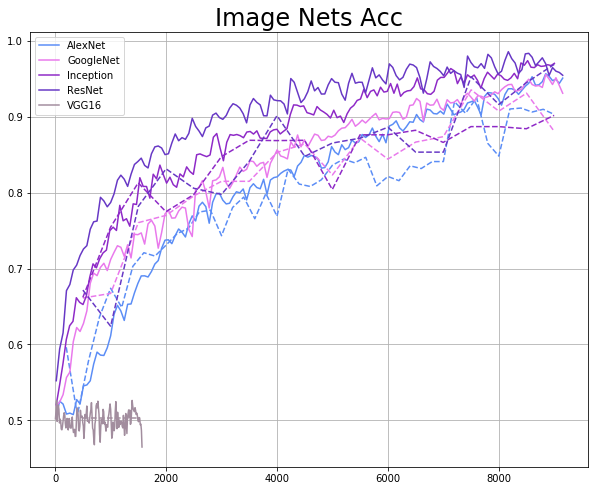

In [20]:
fig = plt.figure(figsize=(10, 8))
draw_acc(image_net, acc_train_df, acc_test_df)
plt.title("Image Nets Acc", fontsize=24)
plt.grid()
plt.legend()
plt.show()

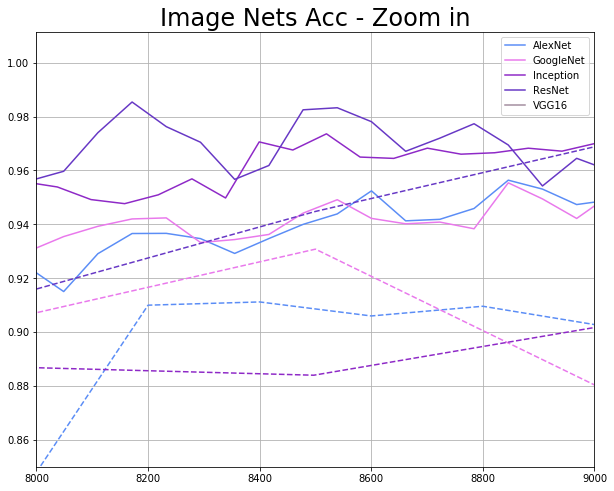

In [21]:
fig = plt.figure(figsize=(10, 8))
draw_acc(image_net, acc_train_df, acc_test_df)
plt.title("Image Nets Acc - Zoom in", fontsize=24)
plt.grid()
plt.xlim(8000, 9000)
plt.ylim(0.85)
plt.legend()
plt.show()

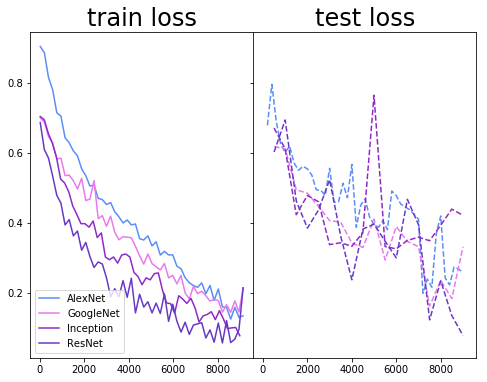

In [22]:
fig, subplots = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
subplots = subplots.flatten()
plt.subplots_adjust(wspace=0, hspace=0)
    
ax = subplots[0]
for name in image_net[:-1]:
    df = loss_train_df[name]
    ax.plot(*smooth(df["Step"], smooth_a(df["Value"]), 50), color=color_map[name], label=name)
    ax.legend(loc="lower left")
    ax.set_title("train loss", fontsize=24)
    
ax = subplots[1]
for name in image_net[:-1]:
    df = loss_test_df[name]
    ax.plot(df["Step"], df["Value"], color=color_map[name], linestyle="--")
    ax.set_title("test loss", fontsize=24)

plt.show()

### Custom Net

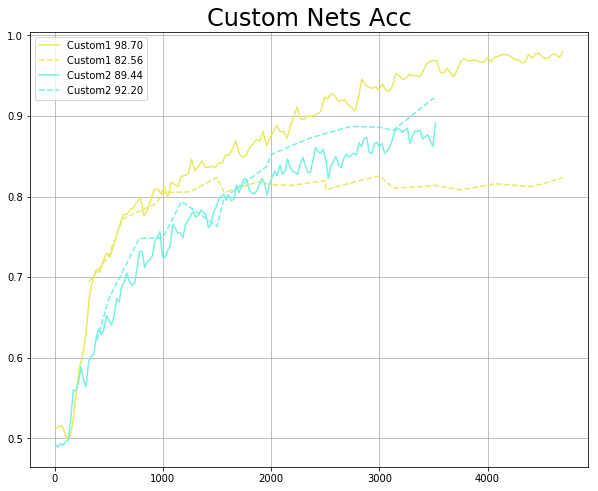

In [23]:
fig = plt.figure(figsize=(10, 8))
for name in custom_net:
    df = acc_train_df[name]
    best = df["Value"].max()
    plt.plot(*smooth(df["Step"], smooth_a(df["Value"]), 150), color=color_map[name], label=name+" {:.2f}".format(best * 100))

    df = acc_test_df[name]
    best = df["Value"].max()
    plt.plot(df["Step"], df["Value"], linestyle="--", color=color_map[name], label=name+" {:.2f}".format(best * 100))

plt.title("Custom Nets Acc", fontsize=24)
plt.grid()
plt.legend()
plt.show()

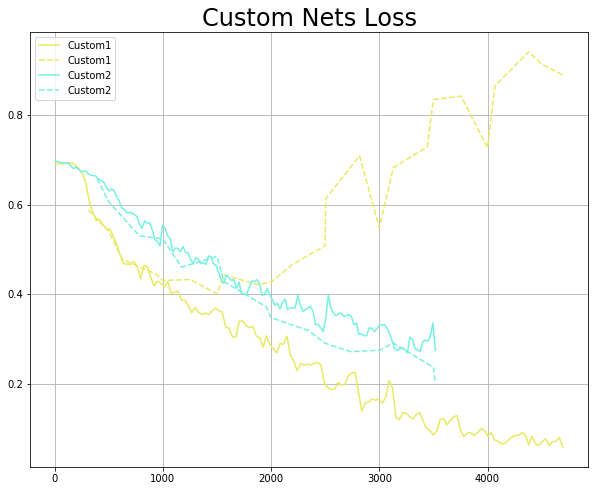

In [24]:
fig = plt.figure(figsize=(10, 8))
for name in custom_net:
    df = loss_train_df[name]
    plt.plot(*smooth(df["Step"], smooth_a(df["Value"]), 150), color=color_map[name], label=name)

    df = loss_test_df[name]
    plt.plot(df["Step"], df["Value"], linestyle="--", color=color_map[name], label=name)

plt.title("Custom Nets Loss", fontsize=24)
plt.grid()
plt.legend()
plt.show()

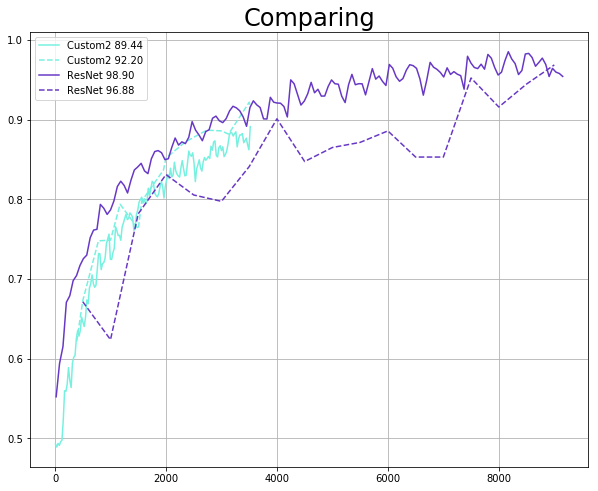

In [25]:
fig = plt.figure(figsize=(10, 8))
for name in ["Custom2", "ResNet"]:
    df = acc_train_df[name]
    best = df["Value"].max()
    plt.plot(*smooth(df["Step"], smooth_a(df["Value"]), 150), color=color_map[name], label=name+" {:.2f}".format(best * 100))

    df = acc_test_df[name]
    best = df["Value"].max()
    plt.plot(df["Step"], df["Value"], linestyle="--", color=color_map[name], label=name+" {:.2f}".format(best * 100))

plt.title("Comparing", fontsize=24)
plt.grid()
plt.legend()
plt.show()

## Rank

In [26]:
acc_test_df.max().ix[2]

AlexNet      0.9248
Custom1      0.8256
Custom2      0.9220
GoogleNet    0.9352
Inception    0.9016
ResNet       0.9688
VGG16        0.5036
Name: Value, dtype: float64

In [27]:
acc_test_df.max().ix[2].rank(ascending=False).sort_values()

ResNet       1.0
GoogleNet    2.0
AlexNet      3.0
Custom2      4.0
Inception    5.0
Custom1      6.0
VGG16        7.0
Name: Value, dtype: float64

# Further

```python
fig = plt.figure(figsize=(16, 12))
for num, data in enumerate(test_data[np.random.choice(range(0, 12500), 12)], 1):
    img_num = data[1]
    img_data = data[0]
    
    subplot = fig.add_subplot(3, 4, num)
    img = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    predict = model.predict([img])[0]
    
    if np.argmax(predict) == 1:
        label = "Dog {:.2f}%".format(float(max(predict)) * 100)
    else:
        label = "Cat {:.2f}%".format(float(max(predict)) * 100)
        
    subplot.imshow(img_data, cmap="gray")
    plt.title(label)
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_xaxis().set_visible(False)
plt.show();
```

![](./images/result.png)